<font size = 6>
Лабораторная работа "Проверка нормальности распределения"

Выполнил - Карабалин Руслан, ММБ-104-О-02

Цель работы - проверить гипотезу о нормальности распределения исследуемого
признака генеральной совокупности.

# Введение

Подключим библиотеку readxl и импортируем данные в переменную ds0

In [ ]:
library(readxl)

ds0 <- read_xlsx("AD.ds3.xlsx")
head(ds0)

v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,⋯,v112,v113,v114,v115,v116,v117,v118,v119,v120,G
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.093650,9.106130,-18.0265107,2.689088,26.0415089,9.056006,28.067265,22.01410,36.526019,18.529536,⋯,2.008877,-10.9683885,-15.425773,-30.659703,-2.751252,3.666438,25.07425,0.4602339,-34.12734,1
11.853664,-1.287746,-26.2812665,-21.672478,0.9784497,-19.722558,-45.017433,19.22712,34.183479,65.385567,⋯,1.447923,-4.5075314,-5.578855,3.159857,30.422340,34.115070,18.17564,7.3897309,-29.03563,3
7.770431,-6.649831,-18.1381057,-9.144086,-6.8826825,-50.593063,-7.432258,18.87088,32.183995,-15.468149,⋯,17.018063,-6.2490204,-21.093471,-11.894213,30.611333,-9.326853,11.51873,39.6502015,-28.20107,3
10.238958,-2.855306,6.4751856,-28.758874,-13.5894953,36.731543,-66.276622,14.93995,4.869532,6.241263,⋯,7.282104,-7.7614988,-17.341714,-17.380103,11.515355,-9.436993,21.00498,37.2127784,-27.54624,1
10.476734,-7.464716,0.4994871,-1.079881,22.3755631,1.509884,16.760358,27.17550,11.044672,34.019777,⋯,5.934256,-0.4188524,-13.542300,-6.414768,-43.633994,48.206235,10.20883,28.2492306,-25.44640,1
8.060434,6.419596,2.2399416,-15.296829,-7.1321114,36.678201,-25.890487,33.05565,25.684080,24.664169,⋯,5.500893,-2.2440719,-9.973602,-18.503965,-20.252522,-11.240839,36.36294,30.8599124,-22.90782,1


Подключим библиотеку dplyr, при помощи функции select из этого пакета создадим отдельную таблицу на основе столбцов v88 и G

In [ ]:
library(dplyr)

ds388 <- select(ds0, contains("v88"), contains("G"))
head(ds388)

v88,G
<dbl>,<dbl>
-15.425773,1
-5.578855,3
-21.093471,3
-17.341714,1
-13.542300,1
-9.973602,1


Переименуем в полученной таблице столбец "v88" на "s88" и столбец "G" на "Factor"

In [ ]:
colnames(ds388) <- gsub("v", "s", colnames(ds388))
colnames(ds388) <- gsub("G", "Factor", colnames(ds388))
head(ds388)

s88,Factor
<dbl>,<dbl>
-15.425773,1
-5.578855,3
-21.093471,3
-17.341714,1
-13.542300,1
-9.973602,1


С помощью функции factor преобразуем тип столбца Factor

In [ ]:
ds388$Factor <- factor(ds388$Factor)

head(ds388)

s88,Factor
<dbl>,<fct>
-15.425773,1
-5.578855,3
-21.093471,3
-17.341714,1
-13.542300,1
-9.973602,1


Создадим две переменные sample881 и sample884, содержащие первую и четвёртую выборки

In [ ]:
sample881 <- subset(ds388, Factor == 1)
sample881 <- sample881$s88
head(sample881)

[1] -15.425773 -17.341714 -13.542300  -9.973602 -10.514683 -10.115131

In [ ]:
sample884 <- subset(ds388, Factor == 4)
sample884 <- sample884$s88
head(sample884)

[1]  2.893918 -2.914975  5.211493  2.864010 -3.284249 -1.610004

Примечание: номер выборки соответсвует номеру признака на соответствующей генеральной совокупности

# Визуализация данных

Для первой и четвертой выборок построим следующие диаграммы: квантильный график нормального распределения, диаграмму сравнения графика эмпирической плотности с графиком плотности нормального распределения, диаграмму расположения графика эмпирической плотности относительно полосы, определяемой нормальным распределением.

## Выборка 1

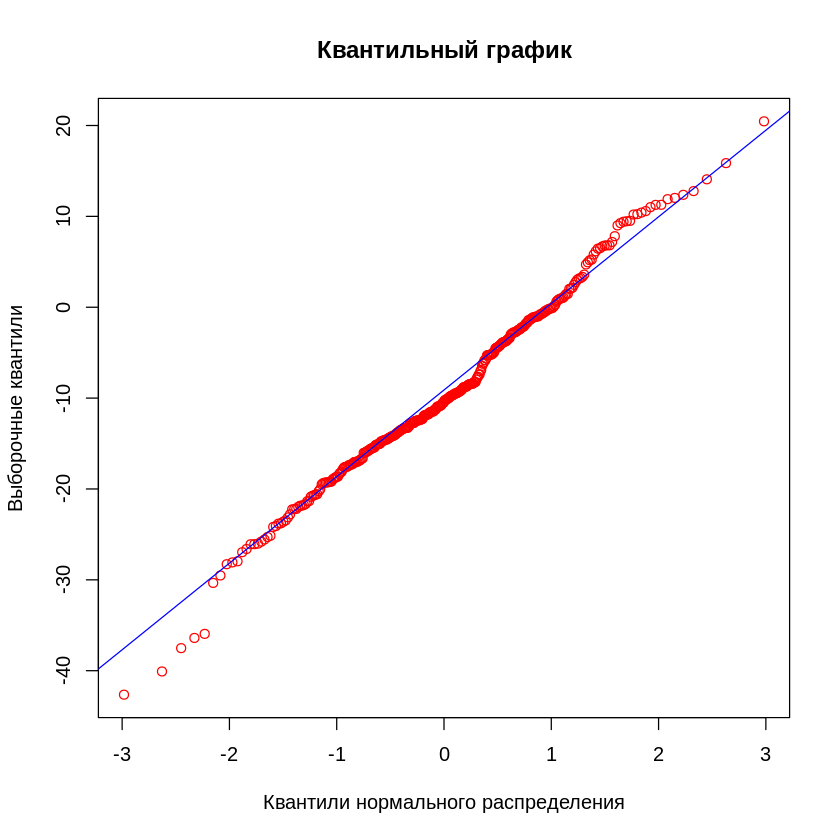

In [ ]:
qqnorm(sample881, col=rgb(1, 0, 0, 1), main="Квантильный график", xlab="Квантили нормального распределения", ylab="Выборочные квантили")
qqline(sample881, col=rgb(0, 0, 1, 1))

На диаграмме большинство точек не выстраиваются вдоль биссектрисы, поэтому можно сделать вывод, что большая часть выборочных квантилей не близка к квантилям нормального распределения. Нормальное распределение возможно не подходит для описания исследуемого признака первой генеральной совокупности.

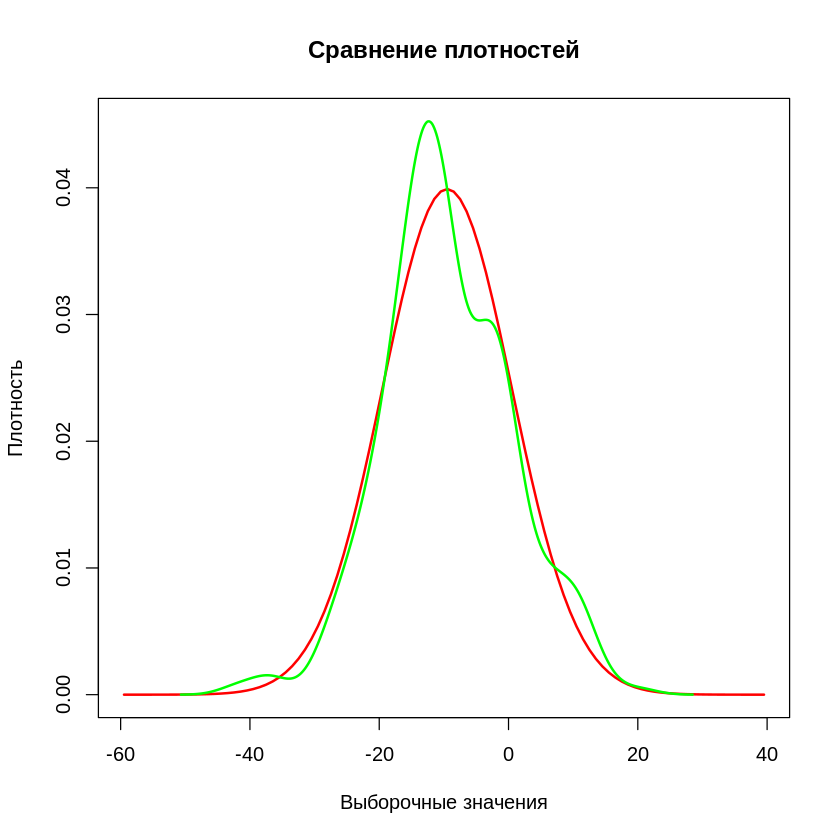

In [ ]:
mean1 <- mean(sample881)
std1 <- sd(sample881)

x1 <- seq(mean1 - 5 * std1, mean1 + 5 * std1)

y1 <- dnorm(x1, mean=mean1, sd=std1)

plot(x1, y1, type="l", col=rgb(1, 0, 0, 1), lwd=2, main="Сравнение плотностей", xlab="Выборочные значения", ylab="Плотность", ylim=c(0, max(y1, density(sample881)$y)))

lines(density(sample881), col=rgb(0, 1, 0, 1), lwd=2)

На диаграмме кривая эмпирической плотности сильно отклонена от кривой плотности нормального распределения, поэтому нормальное распределение возможно не подходит для описания исследуемого признака первой генеральной совокупности.

Установим пакет sm

In [ ]:
install.packages("sm")
library(sm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Построим диаграмму расположения графика эмпирической плотности относительно полосы, определяемой нормальным распределением.

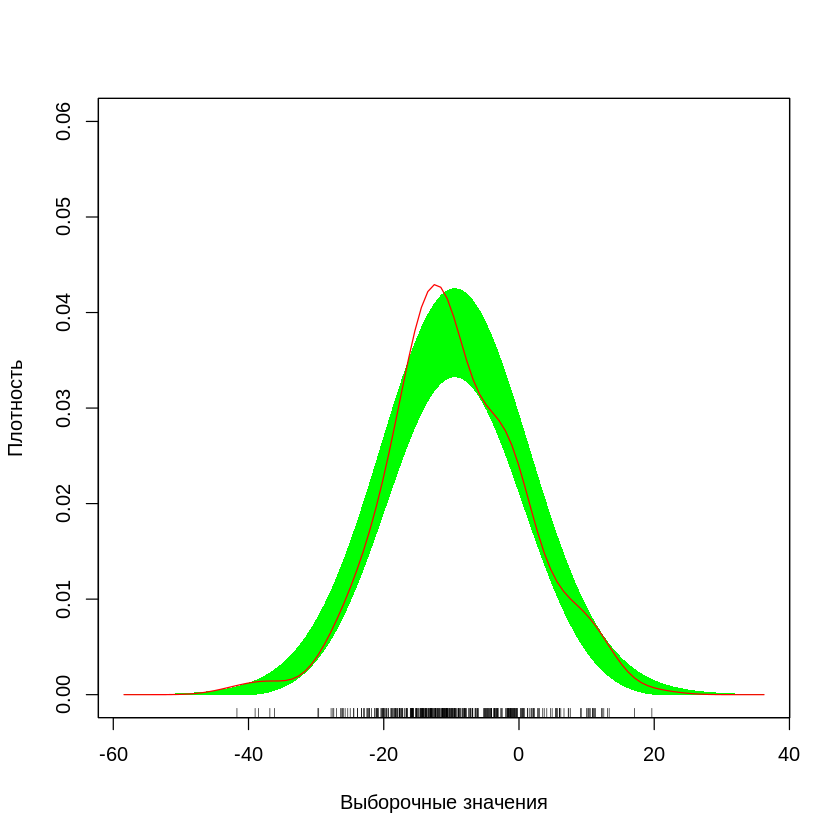

In [ ]:
sm.density(sample881, model="Normal", col=rgb(1, 0, 0, 1), col.band=rgb(0, 1, 0, 1), xlab="Выборочные значения", ylab="Плотность", main="Сравнение эмпирической плотности с полосой нормального распределения")

График эмпирической плотности выходит за область полосы, определяемой нормальным распределением, это означает, что эмпирическая плотность не близка к плотности нормального распределения, поэтому нормальное распределение не подходит для описания исследуемого признака первой генеральной совокупности.

Анализ диаграмм показал, что  нормальное распределение не подходит для описания исследуемого признака первой генеральной совокупности.

## Выборка 4

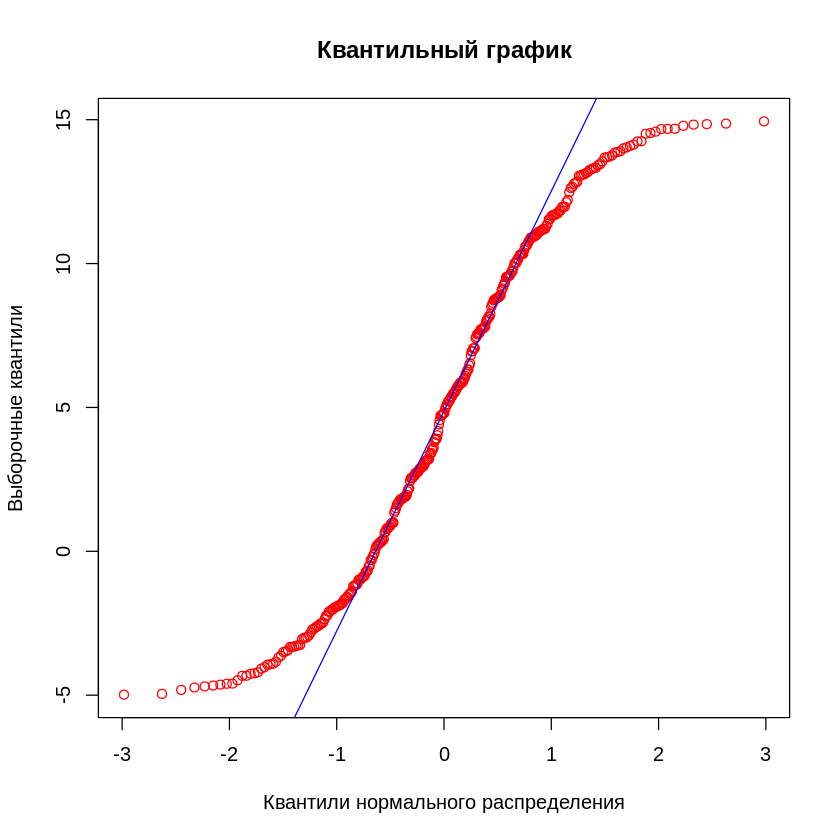

In [ ]:
qqnorm(sample884, col=rgb(1, 0, 0, 1), main="Квантильный график", xlab="Квантили нормального распределения", ylab="Выборочные квантили")
qqline(sample884, col=rgb(0, 0, 1, 1))

На диаграмме большинство точек не выстраиваются вдоль биссектрисы, поэтому можно сделать вывод, что большая часть выборочных квантилей не близка к квантилям нормального распределения. Нормальное распределение не подходит для описания исследуемого признака первой генеральной совокупности.

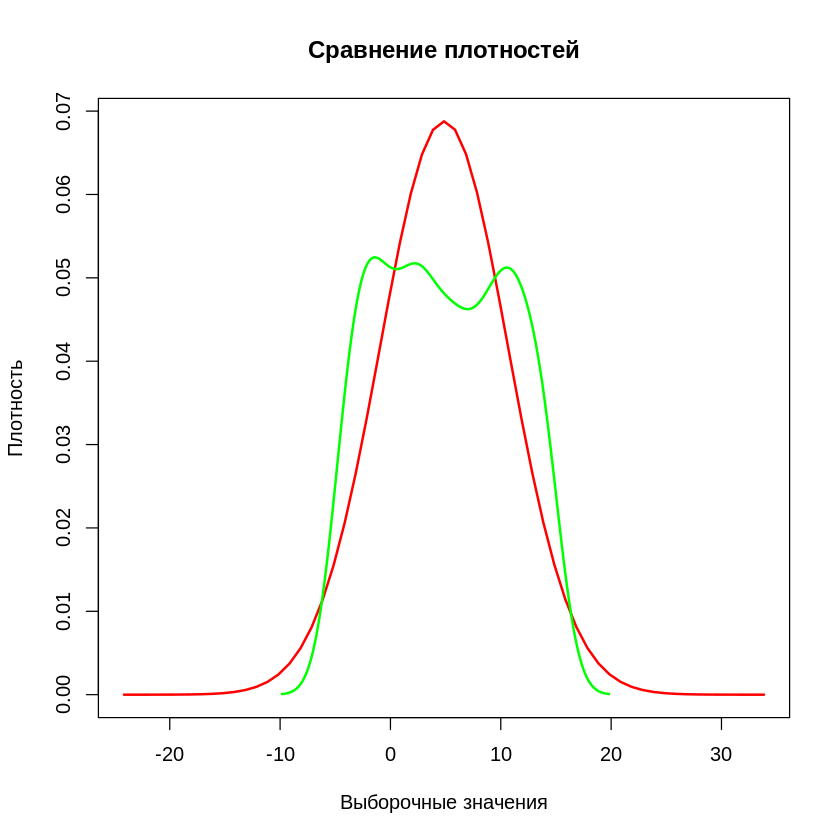

In [ ]:
mean4 <- mean(sample884)
std4 <- sd(sample884)

x4 <- seq(mean4 - 5 * std4, mean4 + 5 * std4)

y4 <- dnorm(x4, mean=mean4, sd=std4)

plot(x4, y4, type="l", col=rgb(1, 0, 0, 1), lwd=2, main="Сравнение плотностей", xlab="Выборочные значения", ylab="Плотность", ylim=c(0, max(y4, density(sample884)$y)))

lines(density(sample884), col=rgb(0, 1, 0, 1), lwd=2)

На диаграмме кривая эмпирической плотности значительно отклонена от кривой плотности нормального распределения, поэтому нормальное распределение не подходит для описания исследуемого признака первой генеральной совокупности.

Построим диаграмму расположения графика эмпирической плотности относительно полосы, определяемой нормальным распределением.

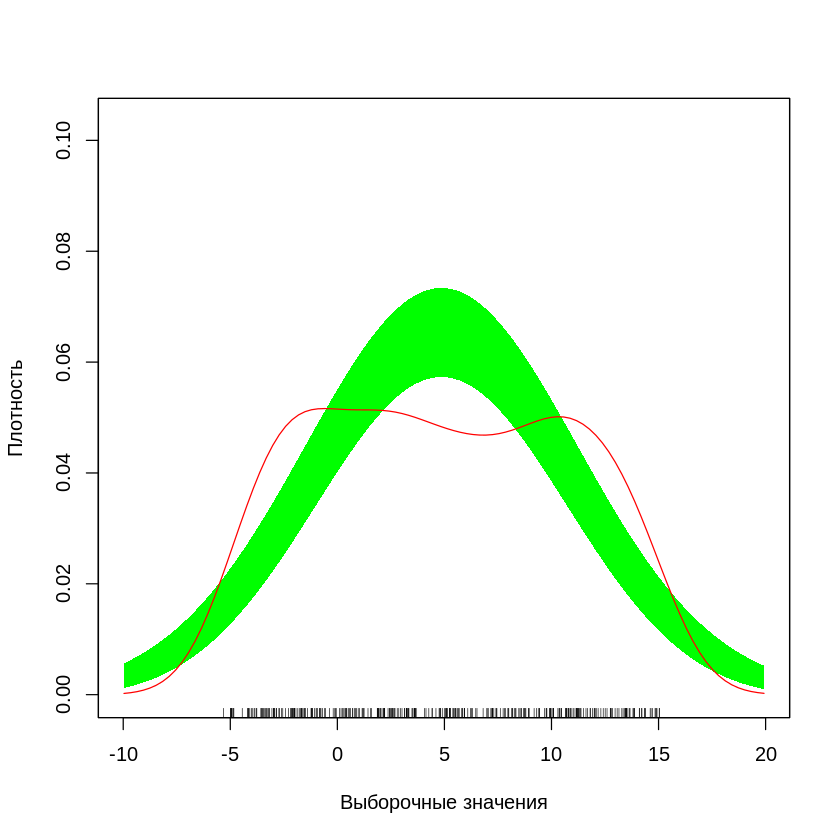

In [ ]:
sm.density(sample884, model="Normal", col=rgb(1, 0, 0, 1), col.band=rgb(0, 1, 0, 1), xlab="Выборочные значения", ylab="Плотность", main="Сравнение эмпирической плотности с полосой нормального распределения")

График эмпирической плотности выходит за область полосы, определяемой нормальным распределением, это означает, что эмпирическая плотность не близка к плотности нормального распределения, поэтому нормальное распределение не подходит для описания исследуемого признака первой генеральной совокупности.

## Итоги визуализации

Анализ диаграмм показал, что  нормальное распределение не подходит для описания исследуемого признака первой генеральной совокупности.

# Использование тестов

Установим пакет nortest

In [ ]:
install.packages("nortest")

library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Выборка 1

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для первой генеральной совокупности, представленной соответствующей выборкой тестом Шапиро-Уилка:

In [ ]:
shapiro_test1 <- shapiro.test(sample881)
shapiro_test1


	Shapiro-Wilk normality test

data:  sample881
W = 0.99118, p-value = 0.03473


p-значение (p-value) меньше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака первой генеральной совокупности отвергается с вероятностью возможной ошибки, равной 0,05

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для первой генеральной совокупности, представленной соответствующей выборкой тестом Андерса-Дарлинга:

In [ ]:
ad_test1 <- ad.test(sample881)
ad_test1


	Anderson-Darling normality test

data:  sample881
A = 1.0848, p-value = 0.007515


p-значение (p-value) меньше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака первой генеральной совокупности отвергается с вероятностью возможной ошибки, равной 0,05

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для первой генеральной совокупности, представленной соответствующей выборкой тестом Крамера-Майзеса:

In [ ]:
cvm_test1 <- cvm.test(sample881)
cvm_test1


	Cramer-von Mises normality test

data:  sample881
W = 0.19712, p-value = 0.005809


p-значение (p-value) меньше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака первой генеральной совокупности отвергается с вероятностью возможной ошибки, равной 0,05

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для первой генеральной совокупности, представленной соответствующей выборкой тестом Колмогорова-Смирнова с поправками Лилльефорса:

In [ ]:
lillie_test1 <- lillie.test(sample881)
lillie_test1


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample881
D = 0.066785, p-value = 0.0007221


p-значение (p-value) меньше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака первой генеральной совокупности отвергается с вероятностью возможной ошибки, равной 0,05

Все тесты показали, что для первой генеральной совокупности, представленной соответствующей выборкой гипотеза о нормальном распределении отвергается.

## Выборка 4

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для четвертой генеральной совокупности, представленной соответствующей выборкой тестом Шапиро-Уилка:

In [ ]:
shapiro_test4 <- shapiro.test(sample884)
shapiro_test4


	Shapiro-Wilk normality test

data:  sample884
W = 0.95153, p-value = 2.537e-09


p-значение (p-value) меньше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака четвертой генеральной совокупности отвергается с вероятностью возможной ошибки, равной 0,05

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для четвертой генеральной совокупности, представленной соответствующей выборкой тестом Андерса-Дарлинга:

In [ ]:
ad_test4 <- ad.test(sample884)
ad_test4


	Anderson-Darling normality test

data:  sample884
A = 4.4277, p-value = 5.238e-11


p-значение (p-value) меньше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака четвертой генеральной совокупности отвергается с вероятностью возможной ошибки, равной 0,05

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для четвертой генеральной совокупности, представленной соответствующей выборкой тестом Крамера-Майзеса:

In [ ]:
cvm_test4 <- cvm.test(sample884)
cvm_test4


	Cramer-von Mises normality test

data:  sample884
W = 0.63499, p-value = 1.903e-07


p-значение (p-value) меньше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака четвертой генеральной совокупности отвергается с вероятностью возможной ошибки, равной 0,05

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для четвертой генеральной совокупности, представленной соответствующей выборкой тестом Колмогорова-Смирнова с поправками Лилльефорса:

In [ ]:
lillie_test4 <- lillie.test(sample884)
lillie_test4


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample884
D = 0.0722, p-value = 0.0001536


p-значение (p-value) меньше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака четвертой генеральной совокупности отвергается с вероятностью возможной ошибки, равной 0,05

Все тесты показали, что для четвертой генеральной совокупности, представленной соответствующей выборкой гипотеза о нормальном распределении отвергается.

## Итоги исследования

Анализ диаграмм и результаты тестов показали, что для обеих генеральных совокупностей, представленных выборками 1 и 4, нормальное распределение не подходит для описания исследуемого показателя.

# Заключение

Цель работы — проверить гипотезу о нормальности распределения исследуемого
признака генеральной совокупности.

Была проведена проверка гипотезы о нормальном распределении. Для анализа использовались библиотеки: readxl, dplyr, sm, nortest.

Использованные инструменты: диаграммы и квантильные графики, тесты Шапиро-Уилка, Андерса-Дарлинга, Крамера-Майзеса, Колмогорова-Смирнова с поправками Лилльефорса. Использовались, соответственно, функции shapiro.test,ad.test, cvm.test и lillie.test пакета nortest.
По итогам анализа диаграмм и тестов можно сказать:

Анализ диаграмм и результаты тестов показали, что для обеих генеральных совокупностей, представленных выборками 1 и 4 нормальное распределение не подходит для описания исследуемого показателя.